<a href="https://colab.research.google.com/github/siddhartha1506/kc_house_data_analysis_prediction/blob/main/Kc_house_data_analysis_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
path='/content/sample_data/kc_house_data.csv'

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Drop id column not important
df.drop('id',inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
#Transform the 'date' column in a usefull column, spliting it in a Year column and Month column
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [ ]:
#turn float to integer data
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

In [ ]:
#to check for null data
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

In [ ]:
#dropping na data
df.dropna(inplace=True)

In [ ]:
#dropping date column column,not important
df.drop('date',inplace=True,axis=1)

In [ ]:
#no null data
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

**Correlated Features**

In [ ]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

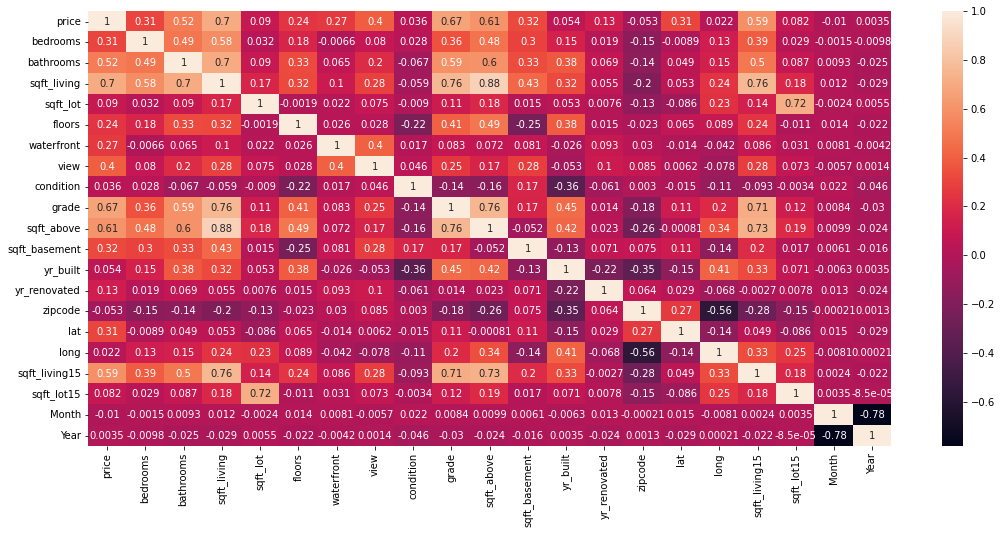

In [ ]:
resizeplot(18,8)
sns.heatmap(df.corr(),annot=True)

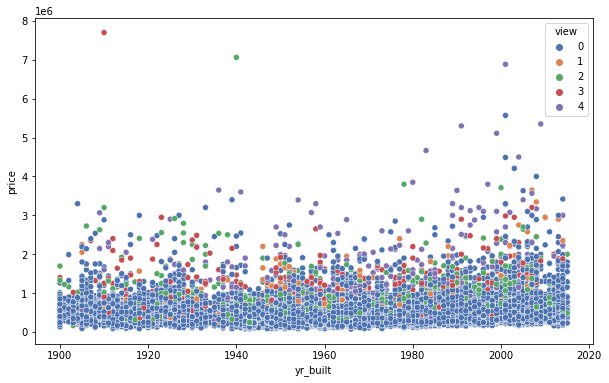

In [ ]:
#To see how the price changed along the years
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')

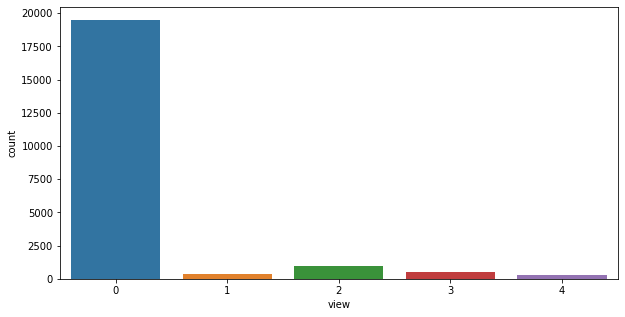

In [ ]:
#Houses without view
resizeplot(10,5)
sns.countplot(x='view',data=df)

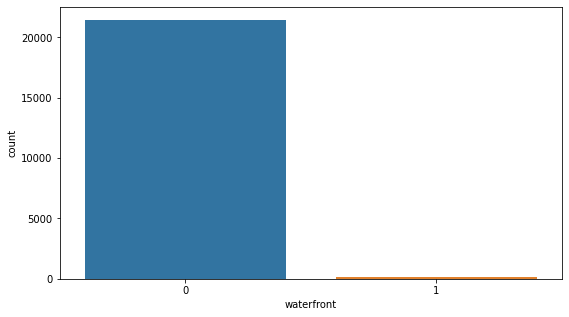

In [ ]:
#Houses without waterfront
resizeplot(9,5)
sns.countplot(x='waterfront',data=df)

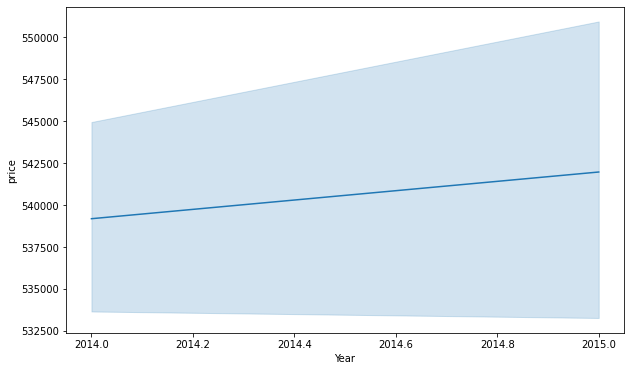

In [ ]:
#Graph showing the increase of the price along the years
resizeplot(10,6)
sns.lineplot(x='Year',y='price',data=df)

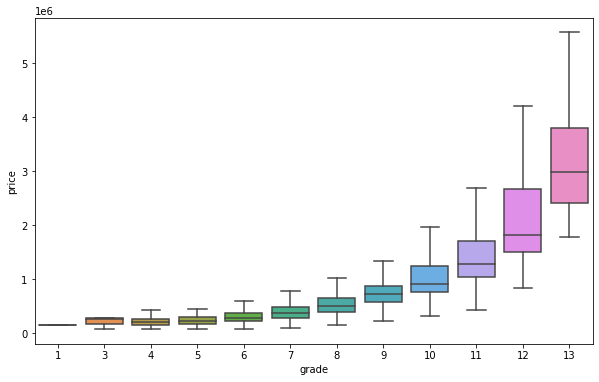

In [ ]:
#Visulaization Grade vs Price
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=df,showfliers=False)

<Figure size 720x432 with 0 Axes>

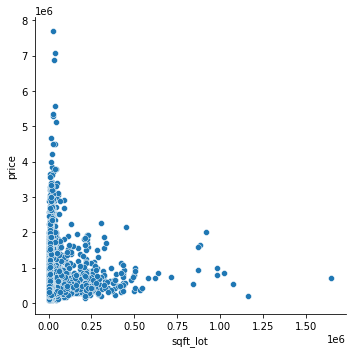

In [ ]:
#sqft_lot vs Price
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=df,palette='terrain')

In [ ]:
#number of rooms with a view vs price
print('Mean of 1 room with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==1)]['price'].mean())
print('Mean of 2 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==2)]['price'].mean())
print('Mean of 3 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==3)]['price'].mean())
print('Mean of 4 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==4)]['price'].mean())

Mean of 1 room with view:  622680.0
Mean of 2 rooms with view:  918567.4838709678
Mean of 3 rooms with view:  1526424.21875
Mean of 4 rooms with view:  1928485.0


In [ ]:
#number of rooms without a view vs price
print('Mean of 1 room without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==1)]['price'].mean())
print('Mean of 2 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==2)]['price'].mean())
print('Mean of 3 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==3)]['price'].mean())
print('Mean of 4 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==4)]['price'].mean())

Mean of 1 room without view:  309781.1030927835
Mean of 2 rooms without view:  395497.62183950166
Mean of 3 rooms without view:  459259.17501793214
Mean of 4 rooms without view:  627880.810992545


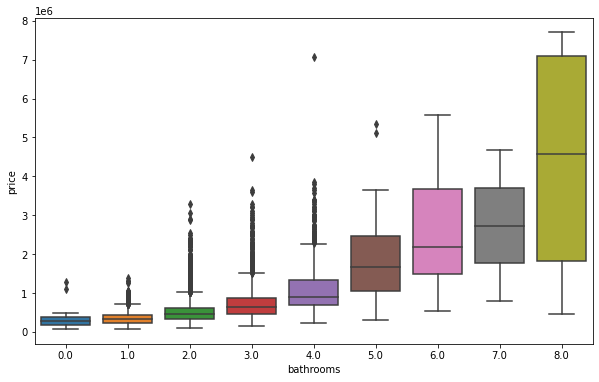

In [ ]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)

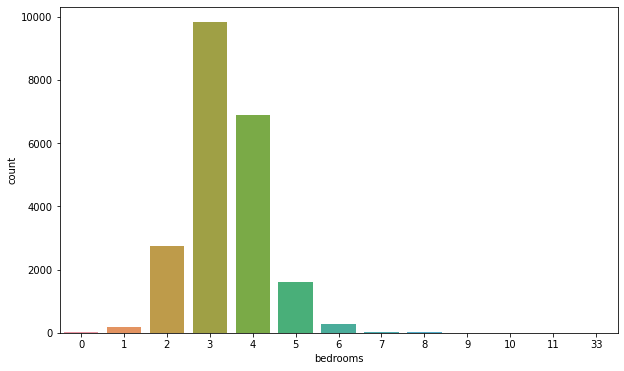

In [ ]:
#count vs number of bedrooms
resizeplot(10,6)
sns.countplot(x='bedrooms',data=df)

**Models comparision**

In [ ]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

**Normalize the Data**

In [ ]:
std = StandardScaler()
X = std.fit_transform(X)

**LINEAR REGRESSION**

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [ ]:
score_lr = lr.score(X_train,y_train)
score_lr

0.6065075278674394

In [ ]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

Mae_lr:  153161.56521346033
Mse_lr:  54824397535.26472
Rmse_lr:  234146.10296834906


In [ ]:
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,333194.535835,-111294.535835
1,538000.0,646143.675916,-108143.675916
2,180000.0,148119.323808,31880.676192
3,604000.0,605687.857613,-1687.857613
4,510000.0,652832.231348,-142832.231348


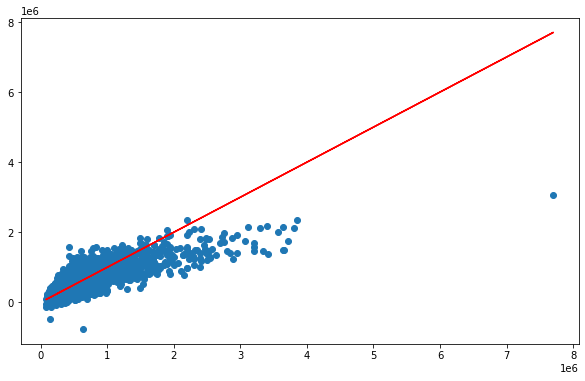

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')

**Decison Tree**

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)
pred_dtr = dtr.predict(X_test)
score_dtr = dtr.score(X_train,y_train)
score_dtr

0.9993665112324681

In [ ]:
mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)
print('Mae_dtr: ',mae_dtr)
print('Mse_dtr: ',mse_dtr)
print('Rmse_dtr: ',rmse_dtr)

Mae_dtr:  168671.58878264442
Mse_dtr:  70711451410.27277
Rmse_dtr:  265916.24886469945


In [ ]:
price_dtr = df['price']
predict_dtr = pd.Series(pred_dtr)
error_dtr = price_dtr-predict_dtr
data_dtr = {'Price':price_dtr,'Predictions':predict_dtr,'Error':error_dtr}
data_prev_dtr = pd.DataFrame(data_dtr)
data_prev_dtr.head()

,Price,Predictions,Error
0,221900.0,410000.0,-188100.0
1,538000.0,600000.0,-62000.0
2,180000.0,290000.0,-110000.0
3,604000.0,400000.0,204000.0
4,510000.0,612000.0,-102000.0


In [ ]:
data_prev_dtr['Percentage_error'] = np.abs(data_prev_dtr['Error'])*100/data_prev_dtr['Price']
data_prev_dtr.head()

,Price,Predictions,Error,Percentage_error
0,221900.0,410000.0,-188100.0,84.767913
1,538000.0,600000.0,-62000.0,11.524164
2,180000.0,290000.0,-110000.0,61.111111
3,604000.0,400000.0,204000.0,33.774834
4,510000.0,612000.0,-102000.0,20.000000


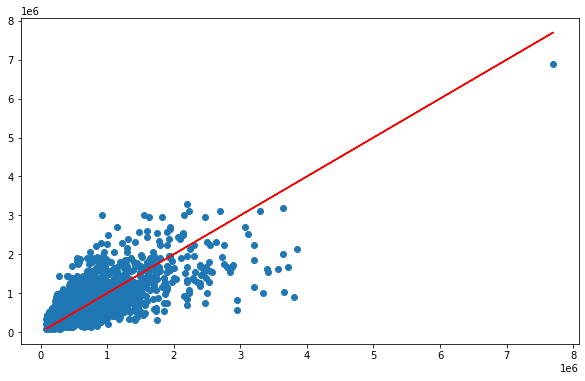

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_dtr)
plt.plot(y_test,y_test,color='red')

**Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
score_rfr = rfr.score(X_train,y_train)
score_rfr

0.959001928609095

In [ ]:
prev_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test,prev_rfr)
mse_rfr = mean_squared_error(y_test,prev_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test,prev_rfr))
print('Mae: ',mae_rfr)
print('Mse: ',mse_rfr)
print('Rmse: ',rmse_rfr)

Mae:  124697.74963643657
Mse:  38500233243.95991
Rmse:  196214.76306323108


In [ ]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr.head()

,Price,Predictions,Error
0,221900.0,341416.045000,-119516.045000
1,538000.0,627885.795000,-89885.795000
2,180000.0,329282.546667,-149282.546667
3,604000.0,468097.315000,135902.685000
4,510000.0,611699.950000,-101699.950000


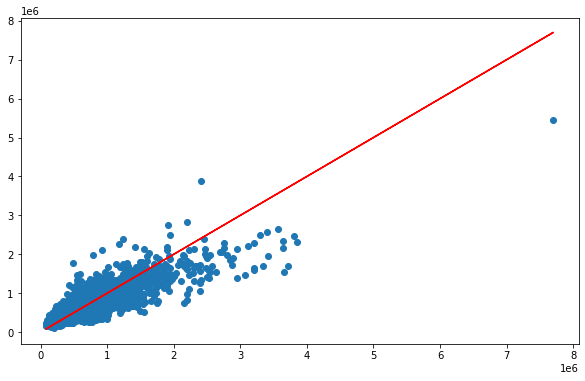

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='red')

**KNN**

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 10)
knr.fit(X_train,y_train)
score_knr = knr.score(X_train,y_train)
score_knr

0.5900228266474303

In [ ]:
pred_knr = knr.predict(X_test)
mae_knr = mean_absolute_error(y_test,pred_knr)
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)
print('Mae_knr: ',mae_knr)
print('Mse_knr: ',mse_knr)
print('Rmse_knr: ',rmse_knr)

Mae_knr:  156090.09705428747
Mse_knr:  69164450976.79938
Rmse_knr:  262991.351524721


In [ ]:
price_knr = df['price']
predict_knr = pd.Series(pred_knr)
error_knr = price_dtr-predict_knr
data_knr = {'Price':price_knr,'Predictions':predict_knr,'Error':error_knr}
data_prev_knr = pd.DataFrame(data_knr)
data_prev_knr.head()

,Price,Predictions,Error
0,221900.0,383045.0,-161145.0
1,538000.0,502437.5,35562.5
2,180000.0,759160.0,-579160.0
3,604000.0,450965.0,153035.0
4,510000.0,420800.0,89200.0


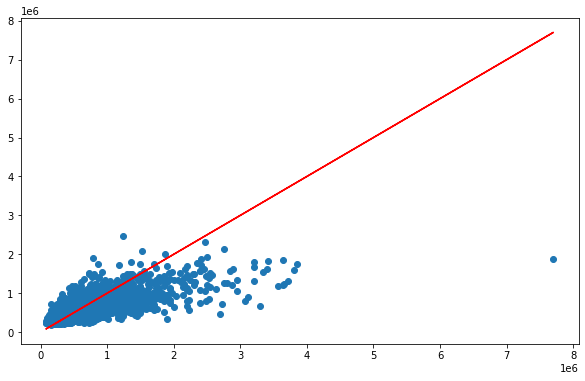

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_knr)
plt.plot(y_test,y_test,color='red')

In [ ]:
print('Linear Regression: ', round(score_lr,3), '->', 'Rmse_LR: ',rmse_lr)
print('Decision Tree Regressor: ',round(score_dtr,3), '->', 'Rmse_DTR: ',rmse_dtr)
print('Random Forrest Regressor: ', round(score_rfr,3), '->', 'Rmse_RFR: ',rmse_rfr)
print('KNN Regressor: ', round(score_knr,3), '->', 'Rmse_KNN: ',rmse_knr)

Linear Regression:  0.607 -> Rmse_LR:  234146.10296834906
Decision Tree Regressor:  0.999 -> Rmse_DTR:  265916.24886469945
Random Forrest Regressor:  0.959 -> Rmse_RFR:  196214.76306323108
KNN Regressor:  0.59 -> Rmse_KNN:  262991.351524721


**Although Decision Tree gave us a 99% score, the mean square error was lower than Decision tree. So it depends upon the analyst.**